In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eli5
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp,info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.chdir("C:\project2")

In [5]:
os.getcwd()

'C:\\project2'

In [6]:
df_train = pd.read_csv("train.csv")

In [7]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
df_train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [9]:
df_train.shape

(200000, 202)

In [10]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
target_class = df_train["target"].value_counts()
print("count of the target class:\n",target_class)

count of the target class:
 target
0    179902
1     20098
Name: count, dtype: int64


In [12]:
import seaborn as sns

Text(0, 0.5, 'Index')

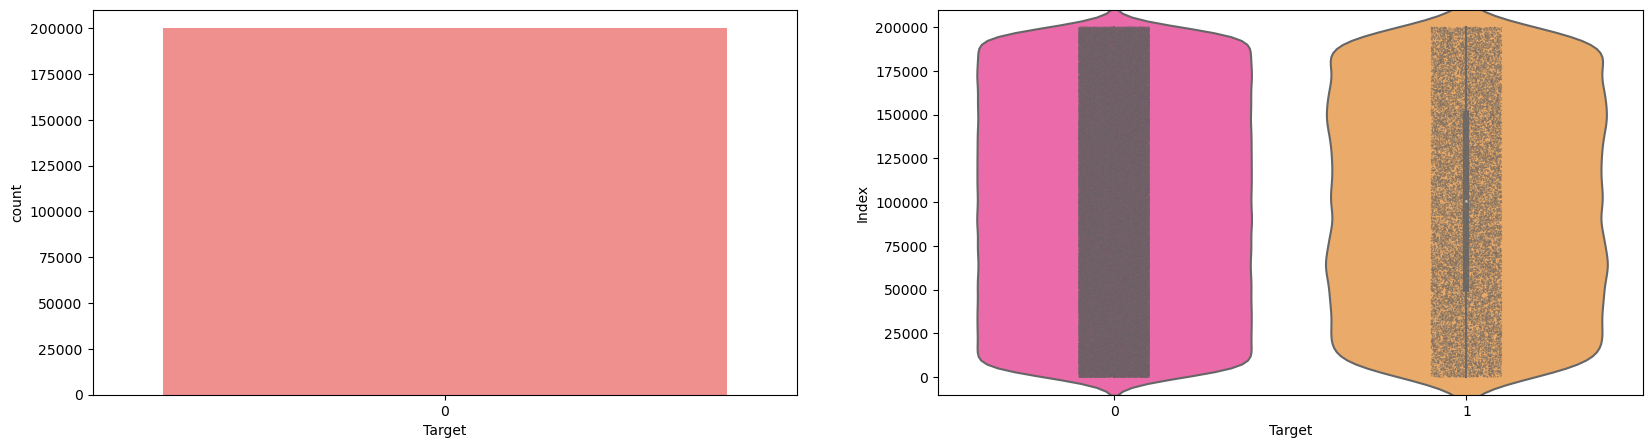

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(df_train.target.values,ax=ax[0],palette="spring")
sns.violinplot(x=df_train.target.values,y=df_train.index.values,ax=ax[1],palette="spring")
sns.stripplot(x=df_train.target.values,y=df_train.index.values,jitter=True,color="black",linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette="spring")
ax[0].set_xlabel("Target")
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index")              

Observation
we are having an unbalanced data with 90% of customers that will make transactions and 10% of those who will not make transaction


Distribution of Train attributes

In [14]:
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style("darkgrid")

    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(18,15))

    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t1[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel("Atrribute",)
        sns.set_style("ticks",{"xtick.major.size":8,"ytick.major.size":8})
    plt.show()
    

Observing first 100 train Attributes

<Figure size 640x480 with 0 Axes>

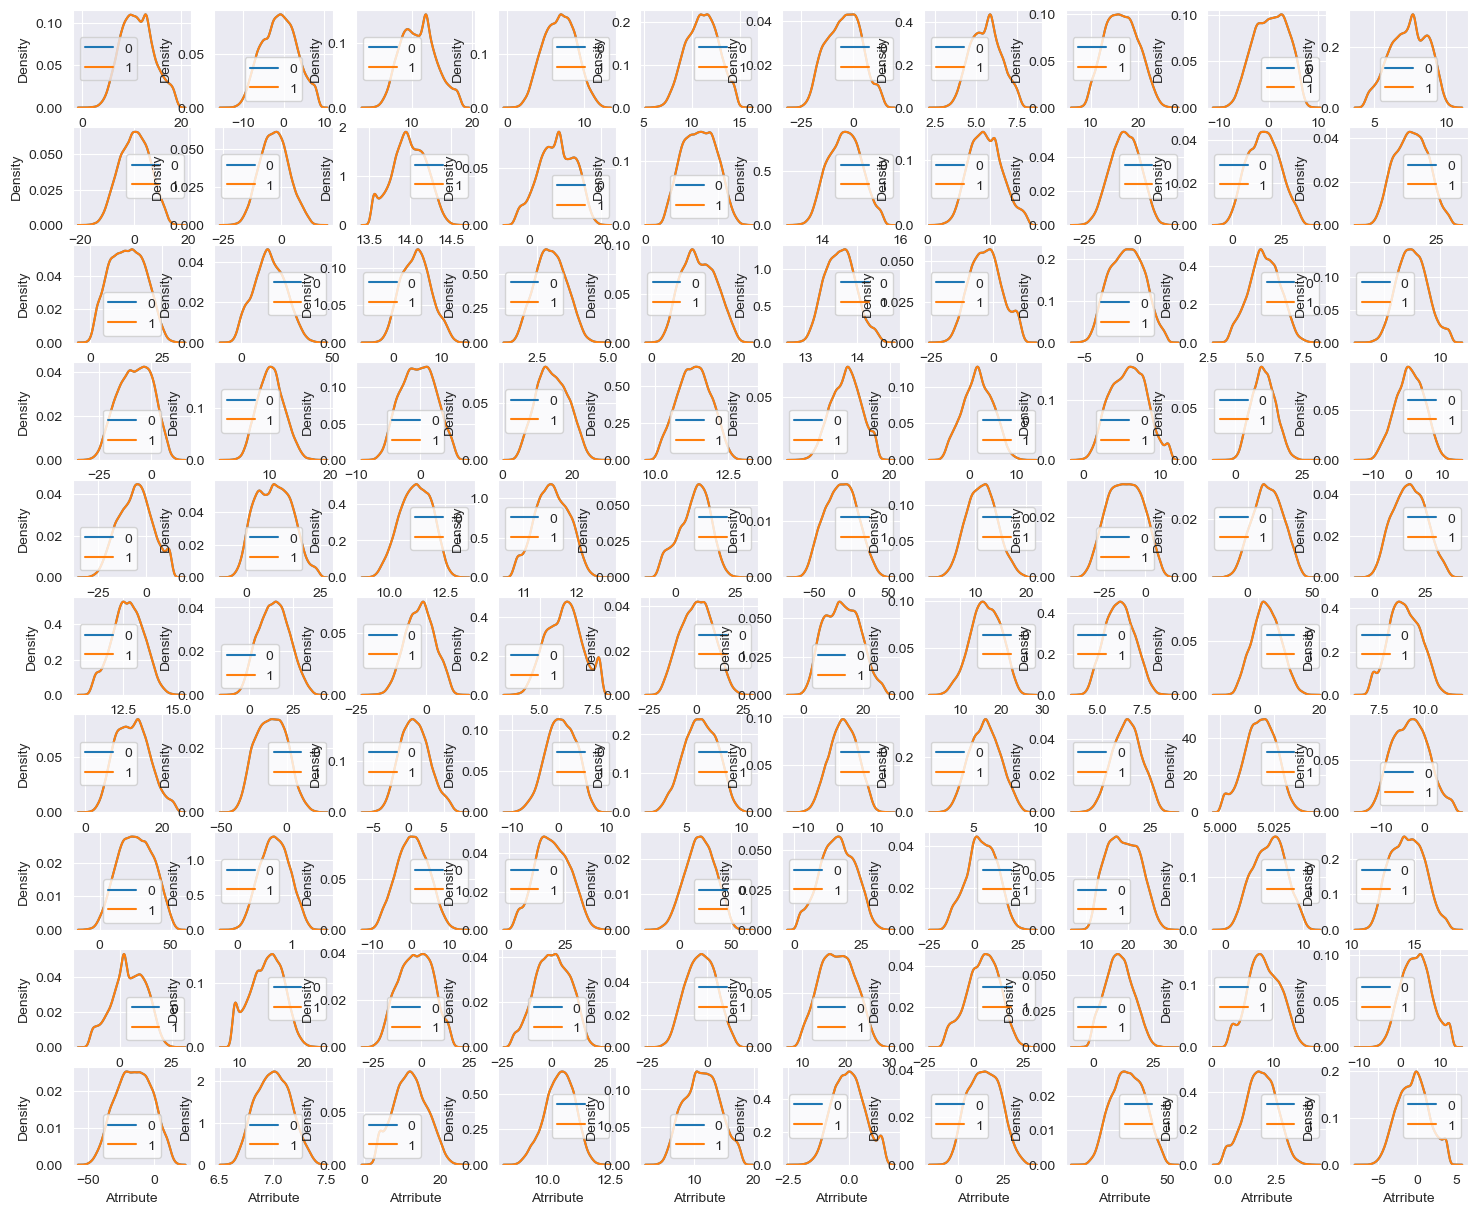

In [15]:
t0=df_train[df_train.target.values==0]
t1=df_train[df_train.target.values==1]

train_attributes=df_train.columns.values[2:102]
plot_train_attribute_distribution(t0,t1,"0","1",train_attributes)


plotting next 100 train attributes

<Figure size 640x480 with 0 Axes>

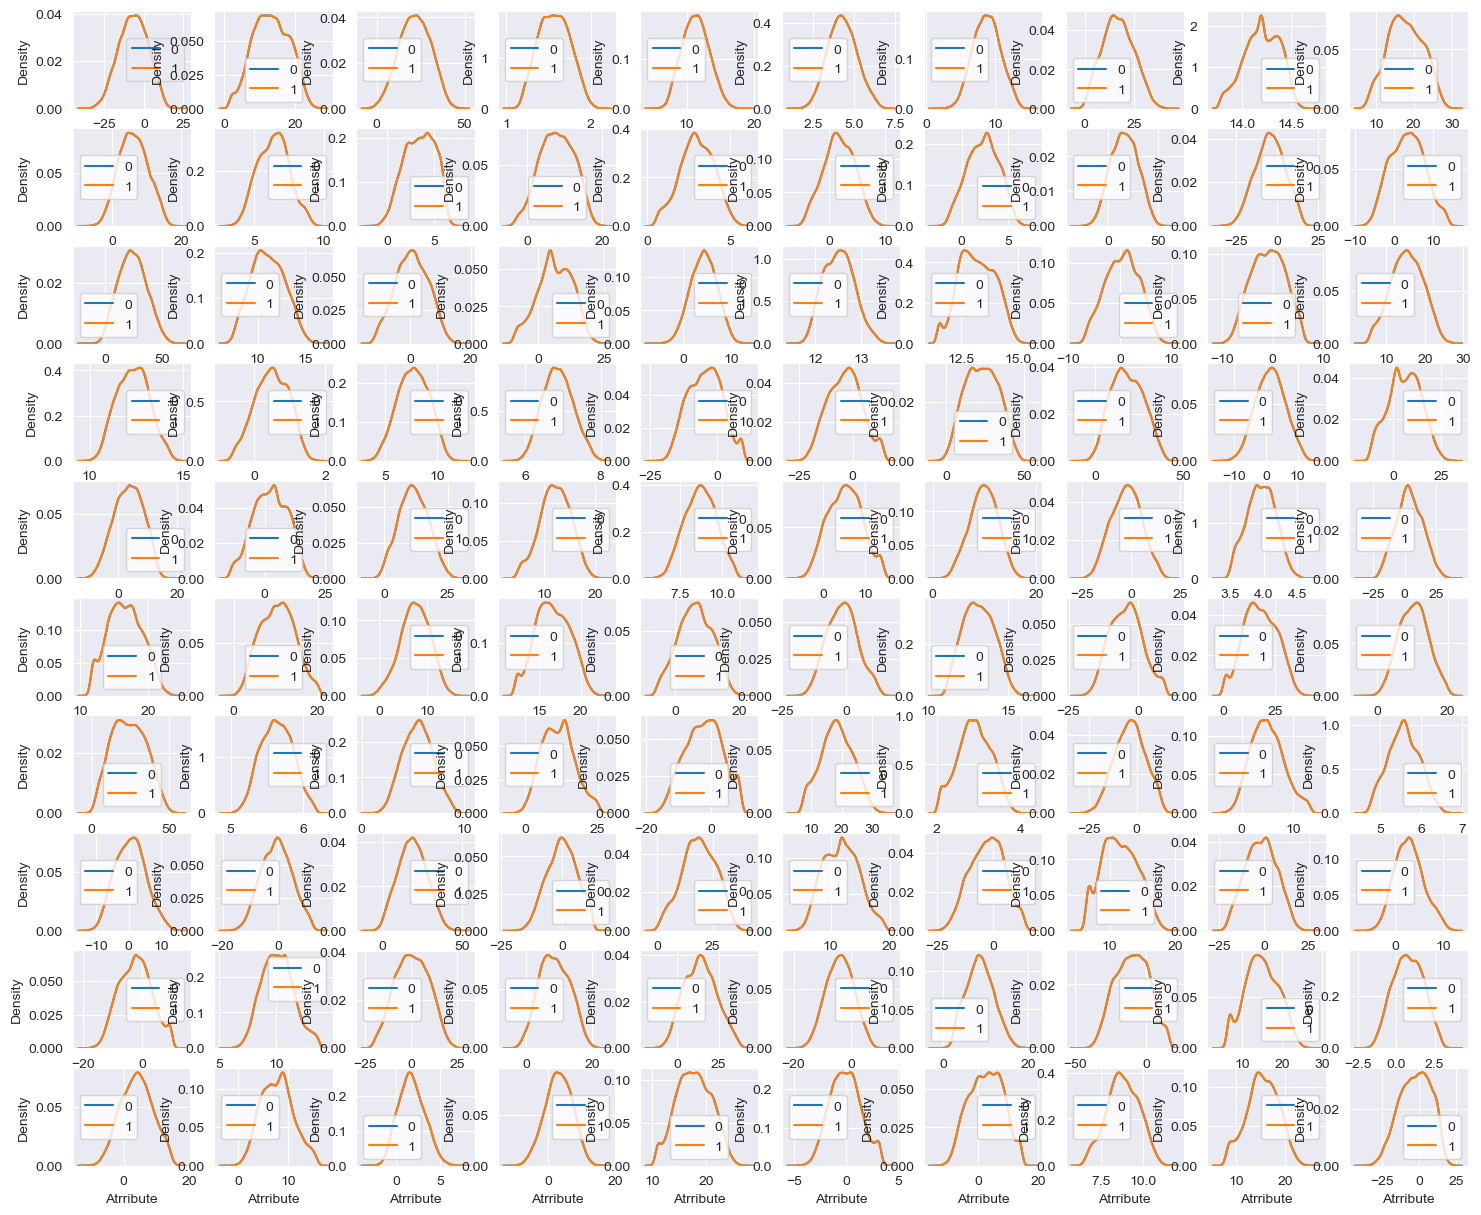

In [16]:
train_attributes=df_train.columns.values[102:202]
plot_train_attribute_distribution(t0,t1,"0","1",train_attributes)


we have observed that many number of features have different distribution and also considerable features which have same distribution.

importing test dataset

In [17]:
df_test=pd.read_csv("test.csv")

In [18]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [19]:
df_test.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,...,0.1398,9.2828,1.3601,4.8985,20.0926,-1.3048,-2.5981,10.3378,14.3340,-7.7094


In [20]:
def plot_test_attribute_distribution(train_attributes):
    i=0
    sns.set_style("darkgrid")

    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(18,15))

    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(df_test[attribute],hist=False)
        plt.xlabel("Atrribute",)
        sns.set_style("ticks",{"xtick.major.size":8,"ytick.major.size":8})
    plt.show()

<Figure size 640x480 with 0 Axes>

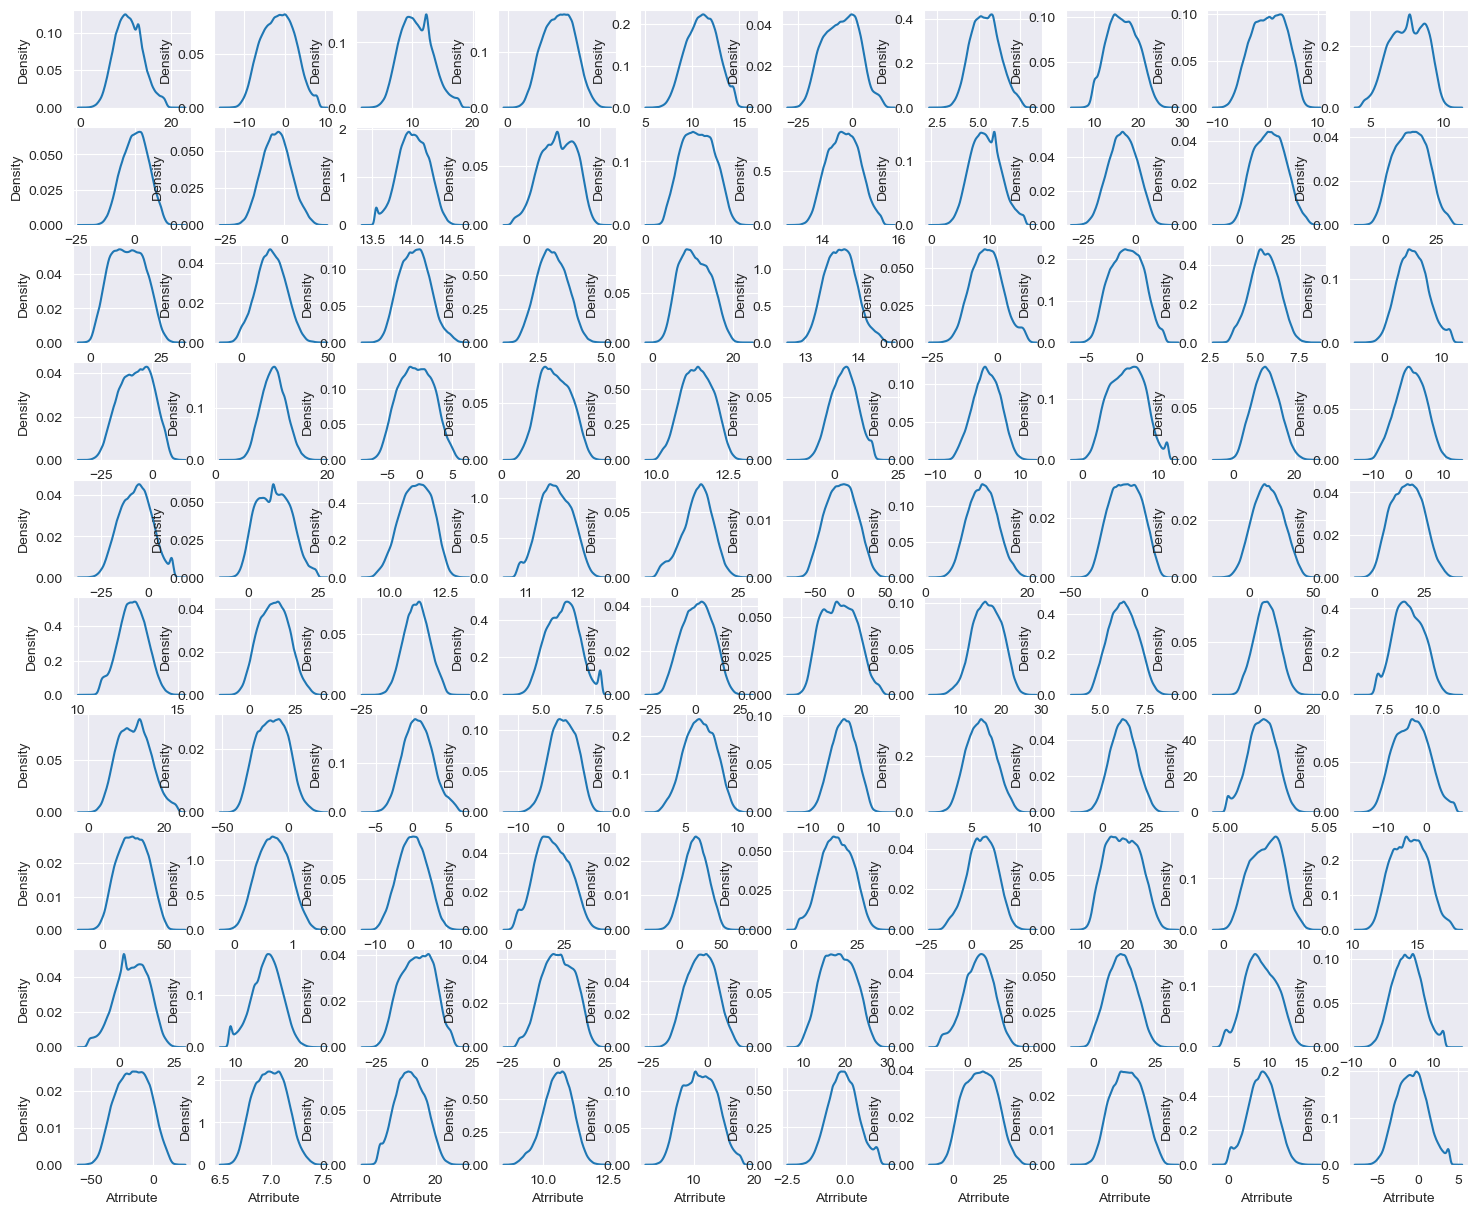

In [21]:
test_attributes=df_test.columns.values[1:101]
plot_test_attribute_distribution(test_attributes)

<Figure size 640x480 with 0 Axes>

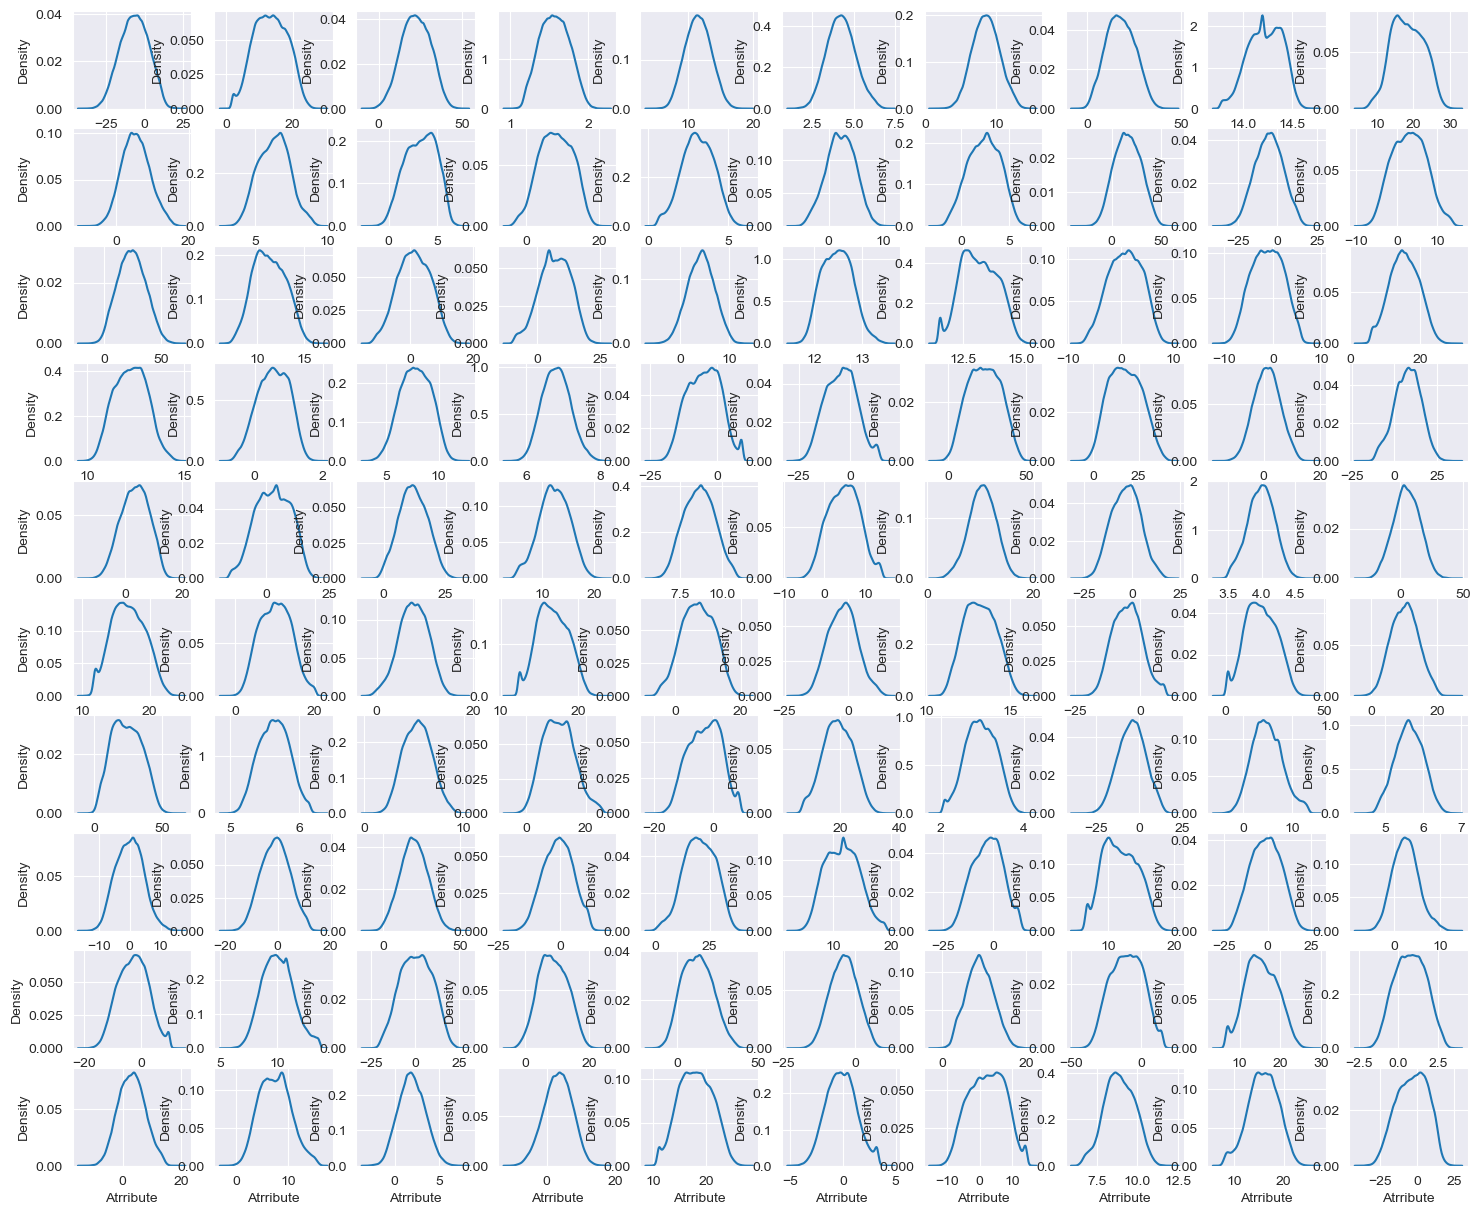

In [22]:
test_attributes=df_test.columns.values[101:201]
plot_test_attribute_distribution(test_attributes)

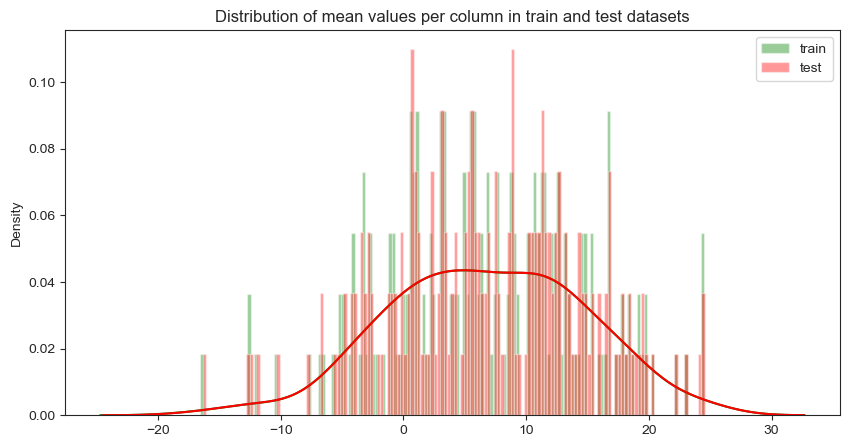

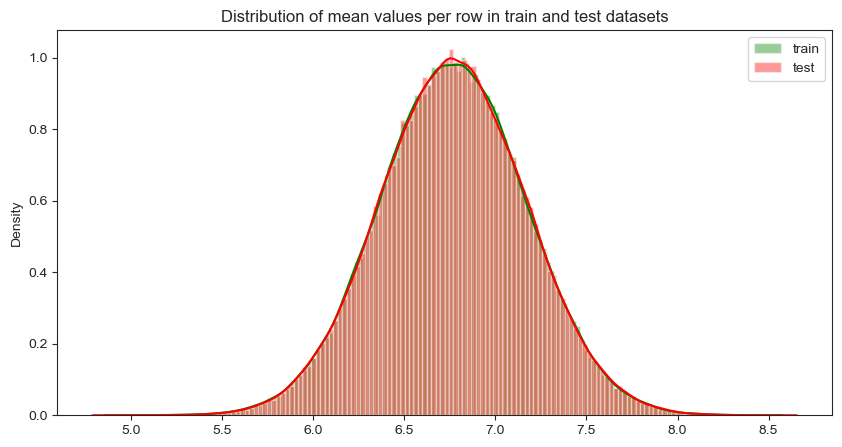

In [23]:
#distribution of mean values per column
plt.figure(figsize=(10,5))

train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]

sns.distplot(df_train[train_attributes].mean(axis=0),color="green",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].mean(axis=0),color="red",kde=True,bins=150,label="test")

plt.title("Distribution of mean values per column in train and test datasets")
plt.legend()
plt.show()


#distribution of mean values per row
plt.figure(figsize=(10,5))

sns.distplot(df_train[train_attributes].mean(axis=1),color="green",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].mean(axis=1),color="red",kde=True,bins=150,label="test")
plt.title("Distribution of mean values per row in train and test datasets")
plt.legend()
plt.show()





distribution of standard deviation per row and column

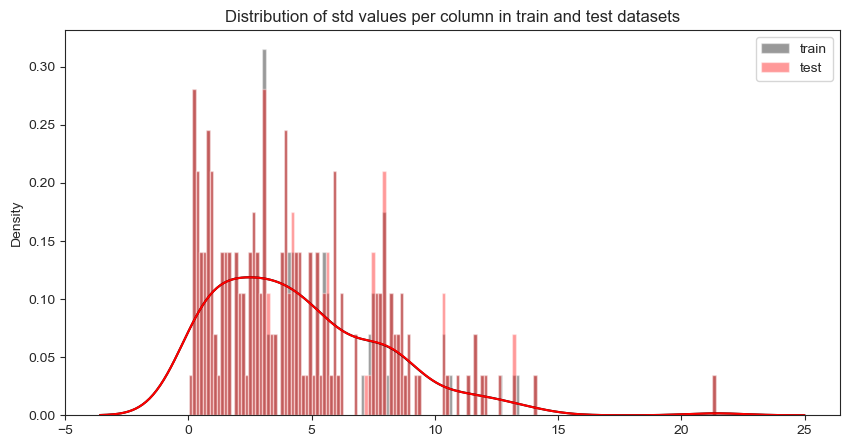

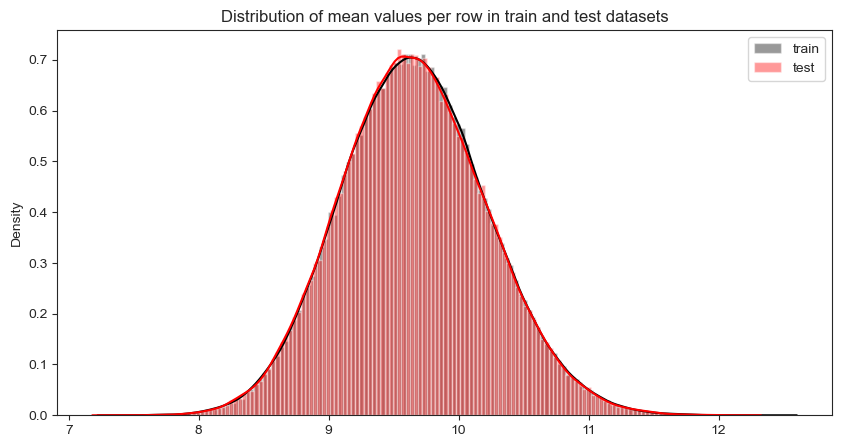

In [24]:
#distribution of std values per column
plt.figure(figsize=(10,5))

train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]

sns.distplot(df_train[train_attributes].std(axis=0),color="black",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].std(axis=0),color="red",kde=True,bins=150,label="test")

plt.title("Distribution of std values per column in train and test datasets")
plt.legend()
plt.show()


#distribution of mean values per row
plt.figure(figsize=(10,5))

sns.distplot(df_train[train_attributes].std(axis=1),color="black",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].std(axis=1),color="red",kde=True,bins=150,label="test")
plt.title("Distribution of mean values per row in train and test datasets")
plt.legend()
plt.show()


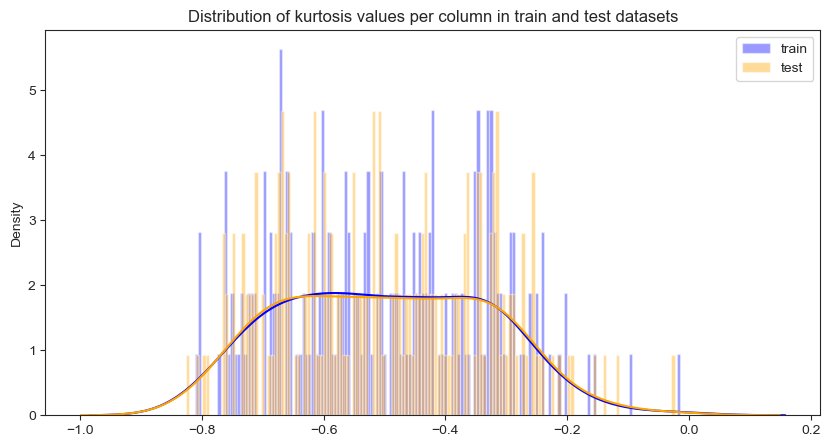

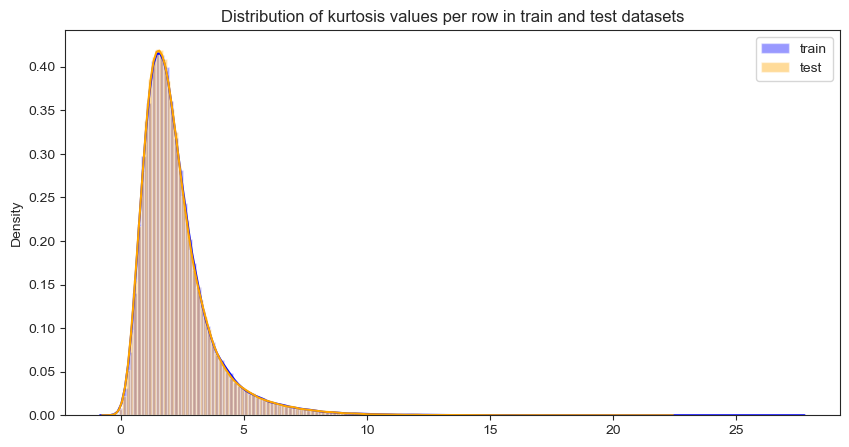

In [25]:
#distribution of kurtosis values per column
plt.figure(figsize=(10,5))

train_attributes=df_train.columns.values[2:202]
test_attributes=df_test.columns.values[1:201]

sns.distplot(df_train[train_attributes].kurtosis(axis=0),color="blue",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].kurtosis(axis=0),color="orange",kde=True,bins=150,label="test")

plt.title("Distribution of kurtosis values per column in train and test datasets")
plt.legend()
plt.show()


#distribution of kurtosis values per row
plt.figure(figsize=(10,5))

sns.distplot(df_train[train_attributes].kurtosis(axis=1),color="blue",kde=True,bins=150,label="train")
sns.distplot(df_test[test_attributes].kurtosis(axis=1),color="orange",kde=True,bins=150,label="test")
plt.title("Distribution of kurtosis values per row in train and test datasets")
plt.legend()
plt.show()


Missing value analysis

In [26]:
train_missing= df_train.isnull().sum().sum()
test_missing= df_test.isnull().sum().sum()
print("Missing values in train dataset=",train_missing)
print("Missing values in test dataset=",test_missing)

Missing values in train dataset= 0
Missing values in test dataset= 0


correlation between attributes


In [27]:
#correlation in train attributes
train_attributes=df_train.columns.values[2:202]
train_correlation=df_train[train_attributes].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
train_correlation=train_correlation[train_correlation["level_0"]!=train_correlation["level_1"]]
print(train_correlation.head(10))
print(train_correlation.tail(10))     

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844


correlation among the train attributes is very small

In [28]:
test_attributes=df_test.columns.values[2:202]
test_correlation=df_test[test_attributes].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
test_correlation=test_correlation[test_correlation["level_0"]!=test_correlation["level_1"]]
print(test_correlation.head(10))
print(test_correlation.tail(10))  

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_113  var_188  1.639749e-07
3  var_188  var_113  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39392  var_164  var_122  0.008513
39393  var_122  var_164  0.008513
39394    var_2  var_164  0.008614
39395  var_164    var_2  0.008614
39396  var_132   var_31  0.008714
39397   var_31  var_132  0.008714
39398  var_143   var_96  0.008829
39399   var_96  var_143  0.008829
39400  var_139   var_75  0.009868
39401   var_75  var_139  0.009868


correlation among the test attributes is very small

correlation plot for test and train dataset

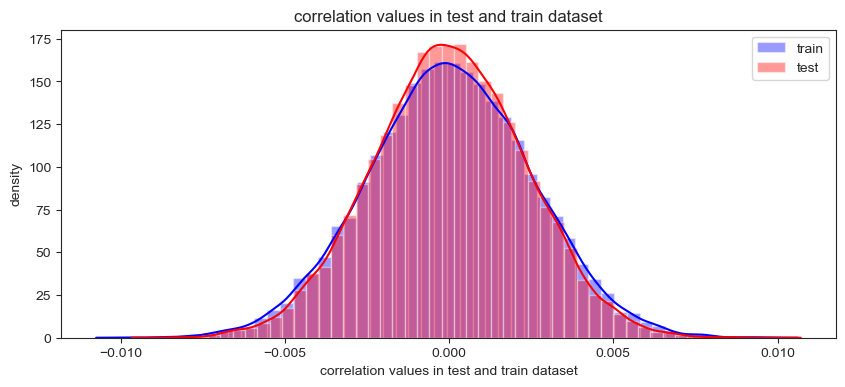

In [29]:
train_correlation=df_train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]

test_correlation=df_test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(10,4))
sns.distplot(train_correlation,color="blue",label="train")
sns.distplot(test_correlation,color="red",label="test")
plt.xlabel("correlation values in test and train dataset")
plt.ylabel("density")
plt.title("correlation values in test and train dataset")
plt.legend()

the correlation values in train and test data set is very small as seen in the graph

Feature Engineering using permutation importance and partial dependence plots

In [30]:
x=df_train.drop(columns=["ID_code","target"],axis=1)
test=df_test.drop(columns=["ID_code"],axis=1)
y=df_train["target"]

build simple model to find which features are important

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)


Random forest classifier model

In [32]:
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)

#fitting the model
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

calculating weights and observing some important features via using eli5

In [33]:
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)

#fitting the model
perm_imp.fit(x_test,y_test)

PermutationImportance(estimator=RandomForestClassifier(n_estimators=10,
                                                       random_state=42),
                      random_state=42)

In [34]:
eli5.show_weights(perm_imp,feature_names=x_test.columns.tolist(),top=200)

Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


Handling of imbalanced data-- multiple approaches can be used

SMOTE(Synthetic minority oversampling technique)
--change of algorithm

Logistic Regression model

In [35]:
#splitting the dataset with stratified K fold cross validator
x=df_train.drop(columns=["ID_code","target"],axis=1)
y=df_train["target"]

skf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index, in skf.split(x,y):
    x_train,x_valid=x.iloc[train_index],x.iloc[valid_index]
    y_train,y_valid=y.iloc[train_index],y.iloc[valid_index]

print("shape of x_train=",x_train.shape)
print("shape of x_valid",x_valid.shape)
print("shape of y_train=",y_train.shape)
print("shape of y_valid=",y_valid.shape)

shape of x_train= (160000, 200)
shape of x_valid (40000, 200)
shape of y_train= (160000,)
shape of y_valid= (40000,)


In [36]:
#fitting LR model
lr_model=LogisticRegression(random_state=42)
lr_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [37]:
lr_score=lr_model.score(x_train,y_train)
print("Accuracy of the lr model",lr_score)

Accuracy of the lr model 0.9122


In [38]:
#cross validation prediction
cv_predict=cross_val_predict(lr_model,x_valid,y_valid,cv=5)
cv_score=cross_val_score(lr_model,x_valid,y_valid,cv=5)
print("cross val score :",np.average(cv_score))
      

cross val score : 0.9103000000000001


we wont be using accuracy because we have imbalanced dataset

In [39]:
#confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
target,,
0,35479,501
1,3087,933


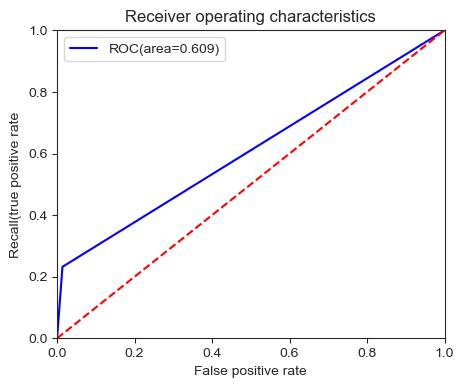

Auc: 0.6090825748965014


In [48]:
#Roc_Auc_curve
plt.figure(figsize=(5,4))
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title("Receiver operating characteristics")
plt.plot(false_positive_rate,recall,"b",label="ROC(area=%0.3f)"%roc_auc)
plt.legend()
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("Recall(true positive rate")
plt.xlabel("False positive rate")
plt.show()
print("Auc:",roc_auc)

         

on comparing model accuracy and roc_auc_score, model is not performing well on imbalanced data

In [50]:
#Classification report
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



so here we observe that f1 score is high for customers who will not make a transaction and less for customers who will make transactions

we will use SMOTE-- it is statistical technique for increasing the number of cases in your dataset in a balanced way.

In [56]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,sampling_strategy=1.0)
#generating synthetic data points
x_smote,y_smote=sm.fit_resample(x_train,y_train)
x_smote_v,y_smote_v=sm.fit_resample(x_valid,y_valid)


Building Logistic regression model on synthetic data

In [57]:
smote=LogisticRegression(random_state=42)
smote.fit(x_smote,y_smote)

LogisticRegression(random_state=42)

In [58]:
#Accuracy of the model
smote_score=smote.score(x_smote,y_smote)
print("Accuracy of the model",smote_score)

Accuracy of the model 0.7887501563346813


In [60]:
#cv prediction on the model
cv_pred=cross_val_predict(smote,x_smote_v,y_smote_v,cv=5)
cv_score=cross_val_score(smote,x_smote_v,y_smote_v,cv=5)
print("cross validation score:" ,np.average(cv_score))

cross validation score: 0.7964007782101167


In [62]:
#confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

In [63]:
cm

col_0,0,1
target,,
0,28200,7780
1,6871,29109


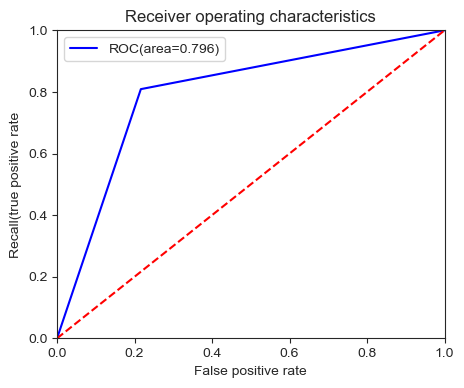

Auc: 0.7964007782101168


In [64]:
plt.figure(figsize=(5,4))
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title("Receiver operating characteristics")
plt.plot(false_positive_rate,recall,"b",label="ROC(area=%0.3f)"%roc_auc)
plt.legend()
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel("Recall(true positive rate")
plt.xlabel("False positive rate")
plt.show()
print("Auc:",roc_auc)

In [65]:
#Classification report
classification_scores=classification_report(y_smote_v,cv_pred)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



we observe that f1 score is high in both the cases

In [66]:
#predicting the model
x_test=df_test.drop(["ID_code"],axis=1)
smote_pred=smote.predict(x_test)
print(x_test)

          var_0    var_1    var_2   var_3    var_4    var_5   var_6    var_7  \
0       11.0656   7.7798  12.9536  9.4292  11.4327  -2.3805  5.8493  18.2675   
1        8.5304   1.2543  11.3047  5.1858   9.1974  -4.0117  6.0196  18.6316   
2        5.4827 -10.3581  10.1407  7.0479  10.2628   9.8052  4.8950  20.2537   
3        8.5374  -1.3222  12.0220  6.5749   8.8458   3.1744  4.9397  20.5660   
4       11.7058  -0.1327  14.1295  7.7506   9.1035  -8.5848  6.8595  10.6048   
...         ...      ...      ...     ...      ...      ...     ...      ...   
199995  13.1678   1.0136  10.4333  6.7997   8.5974  -4.1641  4.8579  14.7625   
199996   9.7171  -9.1462   7.3443  9.1421  12.8936   3.0191  5.6888  18.8862   
199997  11.6360   2.2769  11.2074  7.7649  12.6796  11.3224  5.3883  18.3794   
199998  13.5745  -0.5134  13.6584  7.4855  11.2241 -11.3037  4.1959  16.8280   
199999  10.4664   1.8070  10.2277  6.0654  10.0258   1.0789  4.8879  14.4892   

         var_8   var_9  ...  var_190  v

SMOTE model is performing better

LightGBM--it uses tree based learning algorithm

In [69]:
#training data
lgb_train=lgb.Dataset(x_train,label=y_train)

#validation data
lgb_valid=lgb.Dataset(x_valid,label=y_valid)

In [70]:
#selecting best hyperparameters by tuning of different parameters
params={"boosting_type":"gbdt",
        "max_depth":-1,
        "objective":"binary",
        "boost_from_average":False,
        "nthread": 20,
        "metric": "auc",
        "num_leaves":50,
        "learning_rate":0.01,
        "max_bin":100,
        "subsample for bin": 100,
        "subsample":1,
        "subsample_freq":1,
        "colsample_bytree":0.8,
        "bagging_fraction":0.5,
        "bagging_freq":5,
        "feature_fraction":0.08,
        "min_split_gain":0.45,
        "min_child_weight":1,
        "min_child_samples":5,
        "is_unbalance":True,
       }

In [78]:
#training lgbm model
num_rounds=10000
lgbm=lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid])
lgbm

[LightGBM] [Warning] subsample is set=, subsample=1 will be ignored. Current value: subsample=
[LightGBM] [Warning] Unknown parameter: for
[LightGBM] [Warning] Unknown parameter: bin
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample= will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] subsample is set=, subsample=1 will be ignored. Current value: subsample=
[LightGBM] [Warning] Unknown parameter: for
[LightGBM] [Warning] Unknown parameter: bin
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, su

LGBM model on test dataset

In [81]:
#predict the model
lgbm_pred_prob=lgbm.predict(x_test,random_state=42,num_iteration=lgbm.best_iteration)

#convert binary output from 1 to 0
lgbm_predict=np.where(lgbm_pred_prob>=0.5,1,0)
print(lgbm_pred_prob)
print(lgbm_predict)

[0.25109961 0.28086478 0.36659168 ... 0.00701932 0.20231518 0.21823295]
[0 0 0 ... 0 0 0]


plotting of important features in using lgbm

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

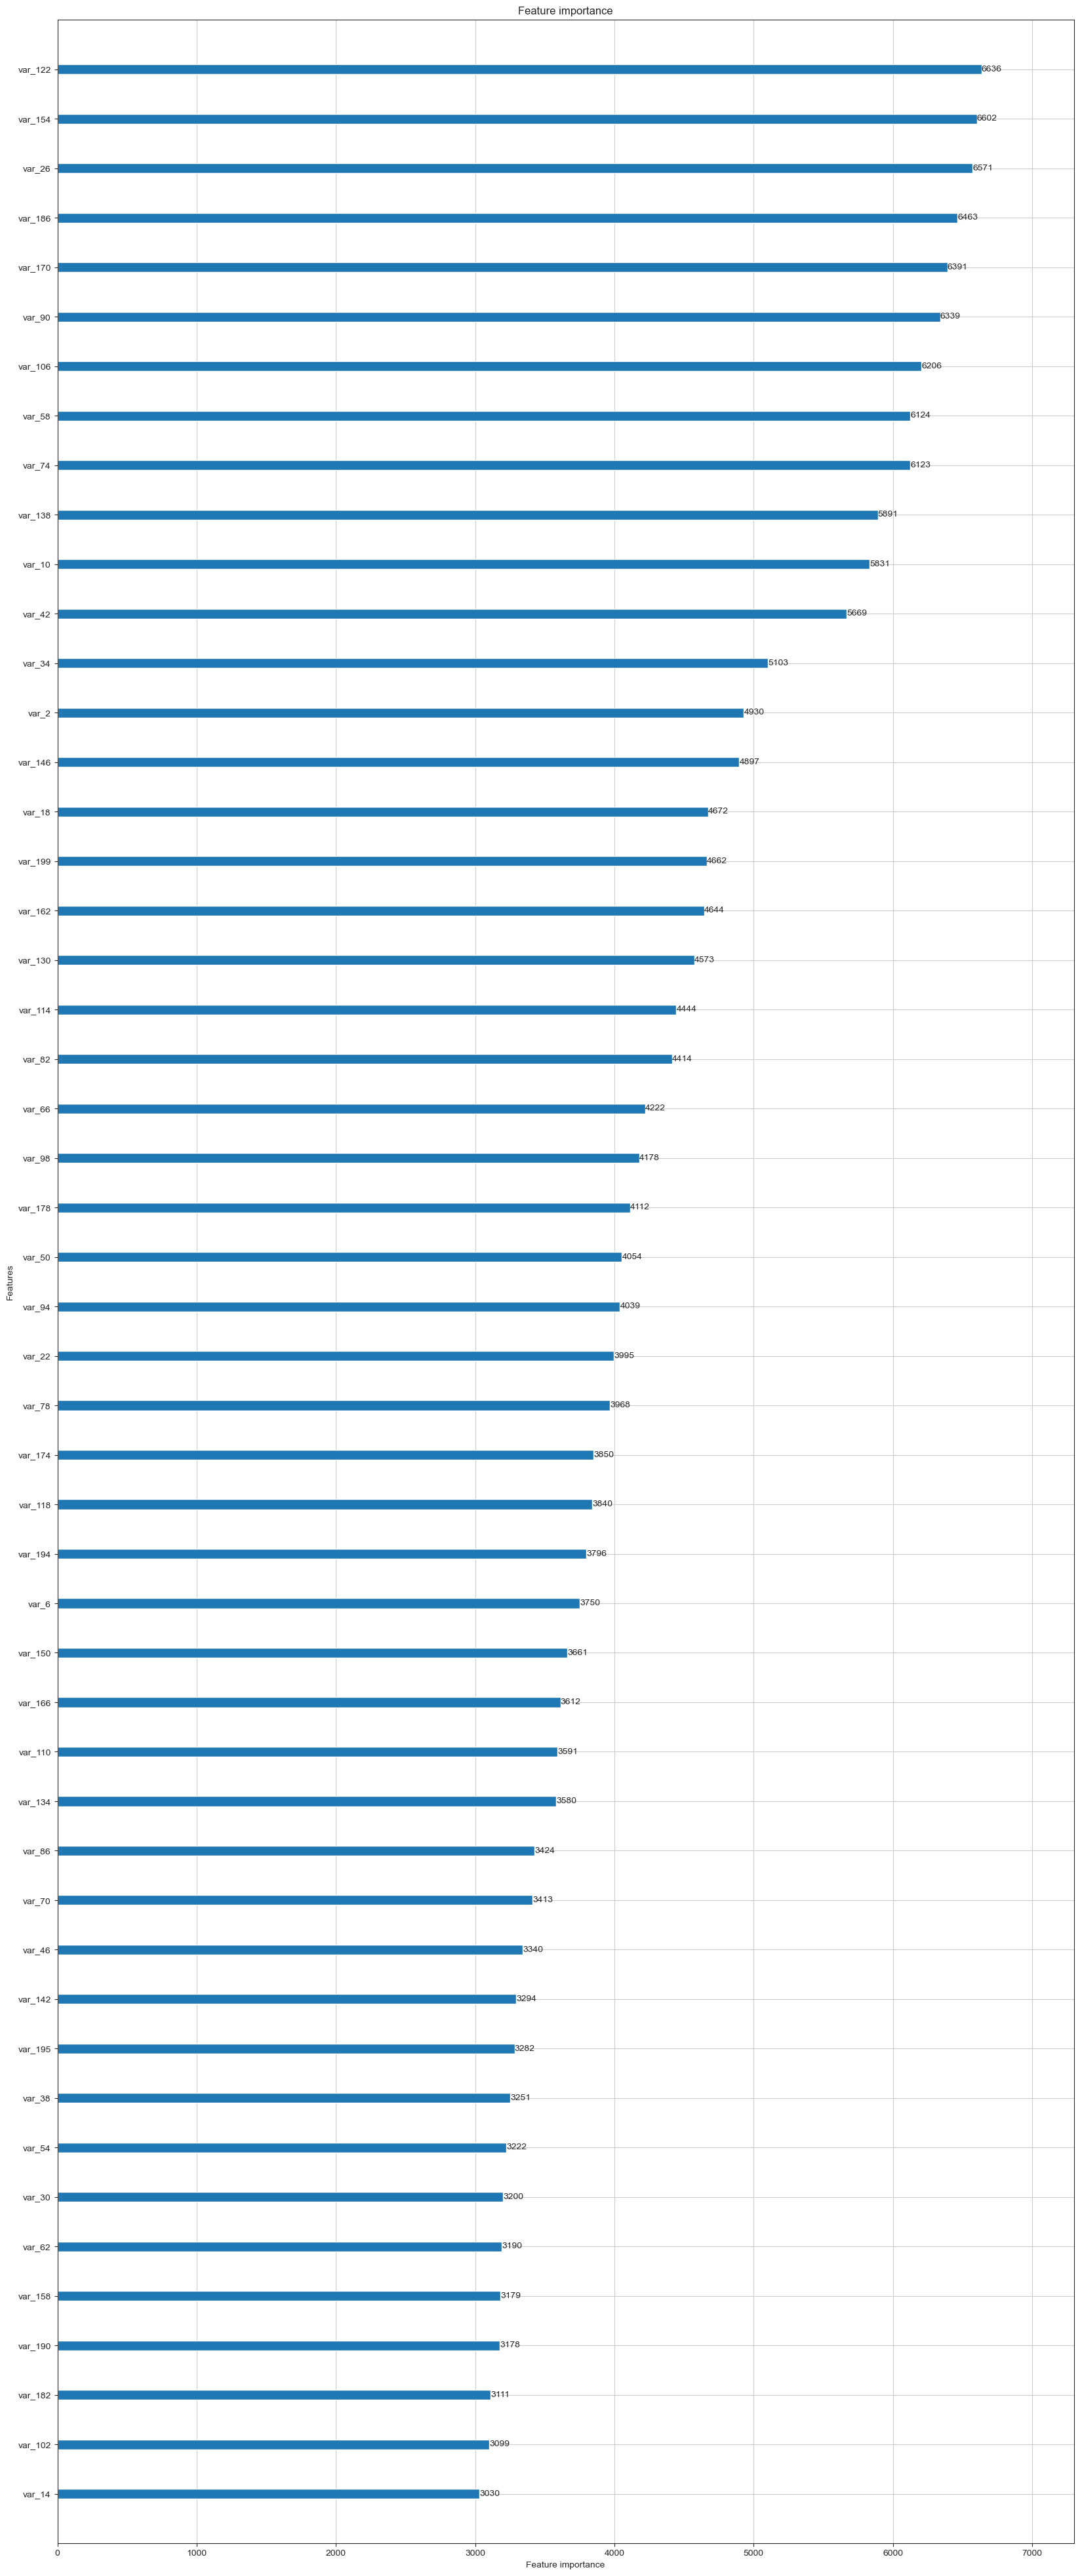

In [84]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [86]:
#final submission
df_sub=pd.DataFrame({"ID_code":df_test["ID_code"].values})
df_sub["lgbm_pred_prob"]=lgbm_pred_prob
df_sub["lgbm_predict"]=lgbm_predict
df_sub.to_csv("submission.csv",index=False)
df_sub.head()

,ID_code,lgbm_pred_prob,lgbm_predict
0,test_0,0.251100,0
1,test_1,0.280865,0
2,test_2,0.366592,0
3,test_3,0.495838,0
4,test_4,0.160980,0
